## Coding Practice #0503

### 1. Convolutional Neural Network with Keras (grayscale images):

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings                   
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')                  # Turn the warnings off.
%matplotlib inline

#### 1.1. Read in the data:

In [2]:
# Bring in the data.
(X_train, y_train), (X_test, y_test) = load_data()
n_train_size = X_train.shape[0]

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# View the shapes.
print("-"*50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("-"*50)
print("Test data X shape: {}".format(X_test.shape))
print("Test data y shape: {}".format(y_test.shape))
print("-"*50)

--------------------------------------------------
Training data X shape: (60000, 28, 28)
Training data y shape: (60000,)
--------------------------------------------------
Test data X shape: (10000, 28, 28)
Test data y shape: (10000,)
--------------------------------------------------


#### 1.2. Visualize the data:

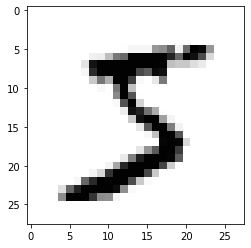

In [4]:
i_image = 0                                   # You may change this at will. 
plt.imshow(X_train[i_image,:,:],cmap="Greys")
plt.show()

#### 1.3. Prepare the data:

In [0]:
# Scaling.
X_train = X_train/255                   
X_test = X_test/255                        

In [0]:
# Reshaping.
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [0]:
# One-hot-encoding.
y = np.concatenate([y_train,y_test],axis=0)
y = to_categorical(y,10)
y_train = y[:n_train_size,:]
y_test = y[n_train_size:,:]

#### 1.4. Define a CNN model:

In [8]:
drop_prob = 0.5
my_model = Sequential()
# 1st convolution + pooling.
my_model.add(Conv2D(input_shape=(28,28,1),filters=32,kernel_size=(5,5),padding='same',activation="relu"))        # 1 channel of grayscale.
my_model.add(MaxPooling2D(pool_size=2))
# 2nd convolution + pooling.
my_model.add(Conv2D(filters=64,kernel_size=(5,5), padding='same',activation="relu"))
my_model.add(MaxPooling2D(pool_size=2))
# Flattened fully connected layer.
my_model.add(Flatten())
my_model.add(Dense(units = 1024, activation="relu"))
# Apply dropout.
my_model.add(Dropout(rate=drop_prob))
# Output layer.
my_model.add(Dense(units = 10, activation="softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
# View the summary.
my_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3212288   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

#### 1.5. Define the hyperparameters and optimizer:

In [0]:
# Hyperparameters.
n_epochs = 10
batch_size = 200
learn_rate = 0.001

In [0]:
# Define the optimizer and then compile.
my_optimizer=Adam(lr=learn_rate)
my_model.compile(loss = "categorical_crossentropy", optimizer = my_optimizer, metrics=["accuracy"])

#### 1.6. Train the model and visualize the history:

In [12]:
# Train the model.
# verbose = 0 means no output. verbose = 1 to view the epochs.
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split = 0.2, verbose = 1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 125s 3ms/sample - loss: 0.2068 - acc: 0.9354 - val_loss: 0.0528 - val_acc: 0.9852
Epoch 2/10
48000/48000 [==============================] - 124s 3ms/sample - loss: 0.0540 - acc: 0.9832 - val_loss: 0.0406 - val_acc: 0.9886
Epoch 3/10
48000/48000 [==============================] - 124s 3ms/sample - loss: 0.0380 - acc: 0.9881 - val_loss: 0.0351 - val_acc: 0.9898
Epoch 4/10
48000/48000 [==============================] - 123s 3ms/sample - loss: 0.0275 - acc: 0.9910 - val_loss: 0.0380 - val_acc: 0.9889
Epoch 5/10
48000/48000 [==============================] - 124s 3ms/sample - loss: 0.0218 - acc: 0.9932 - val_loss: 0.0343 - val_acc: 0.9903
Epoch 6/10
48000/48000 [==============================] - 123s 3ms/sample - loss: 0.0169 - acc: 0.9946 - val_loss: 0.0345 - val_acc: 0.9909
Epoch 7/10
48000/48000 [==============================] - 123s 3ms/sample - loss: 0.0170 - acc: 0.9946 - val_l

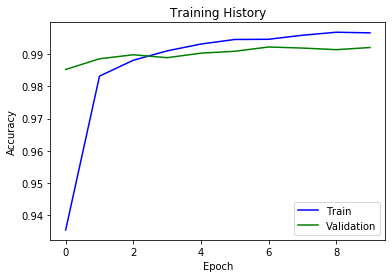

In [13]:
# Visualize the training history. 
n_skip = 0                 # Skip the first few steps.
plt.plot(my_summary.history['acc'][n_skip:], c="b")
plt.plot(my_summary.history['val_acc'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

#### 1.7. Testing: 

In [14]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]    
print("Test Accuracy : {}".format(np.round(ACC,3)))

Test Accuracy : 0.9929999709129333
